<a href="https://colab.research.google.com/github/Gabomatius/MD_Anime/blob/Reglas-de-Asociaci%C3%B3n/reglas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install efficient_apriori
!pip install pip install pyfpgrowth
import pandas as pd 
import numpy as np
from efficient_apriori import apriori
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import KBinsDiscretizer
import os
import pyfpgrowth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.0 MB/s 
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5503 sha256=67a0c884827900bab5742efe640f7d5e0232e3d0f555cde246a148c4b59dd885
  Stored in directory: /root/.cache/pip/wheels/73/97/4b/f12ac994f6bbb99597396255435824c73ad3916be1e678be55
Successfully built pyfpgrowth


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/Shareddrives/Mineria de datos')

Mounted at /content/drive


Para las variable Genres y Producers se cuenta con listas que contienen los diferentes géneros y productores, respectivamente,  en los que puede clasificarse cada registro o serie en el set de datos inicial. Dado que en la gran mayoría de los casos existen varios géneros por serie, estos son susceptibles de interpretarse como transacciones que pueden ser usadas para encontrar reglas de asociación potencialmente informativas a lo largo de todos los registros.

# Asociación entre géneros

In [ ]:
# Número total de reglas que pueden extraerse del itemset Genres
n_total_items = 43
print(f"En total se pueden obtener {2**n_total_items} itemsets para la variable Genre" )
print(f"Y {3**n_total_items - 2**(n_total_items+1) + 1} reglas de asociación")

En total se pueden obtener 8796093022208 itemsets para la variable Genre
Y 328256949802351033212 reglas de asociación


Para la variable Genre se usa el set de datos original, libre de valores desconocidos, en el que se encuentran las listas con los diferentes géneros que corresponden a cada registro. Las listas se llevan a sets para obtener los valores únicos de los géneros y se almacenan en una lista, sobre la que se aplican los diferentes algoritmos de asociación.

In [ ]:
data = pd.read_csv('clean_data.csv') 
#clean_data.csv es el dataset inicial en los que los  Unknown se reemplararon por NaN 

transacciones_generos = []
for registro in data['Genres']:
    if type(registro) is float: #Los NaN en las variables object poseen type = float
        continue
    transaccion = registro.split(',')
    if len(transaccion) != 0:
      transacciones_generos.append(set(transaccion))
  
print('El total de transacciones es = ', len(transacciones_generos))

El total de transacciones es =  17499


### Implementación del algoritmo Apriori

Se procede a explorar las posibles reglas que pueden deducirse de la lista de transacciones usando  el algoritmo efficient_apriori de la librería apriori. Se grafica el número de reglas totales que pueden encontrarse para diferentes valores de soporte (manteniendo la confianza mínima constante) y viceversa, encontrándose que el rango de dichos valores en el que pueden encontrarse suficientes reglas para ser evaluadas es muy corto. Por su parte el rango de valores de confianza (manteniendo constante el soporte mmínimo) que puede usarse para encontrar reglas suficientes es más amplio.

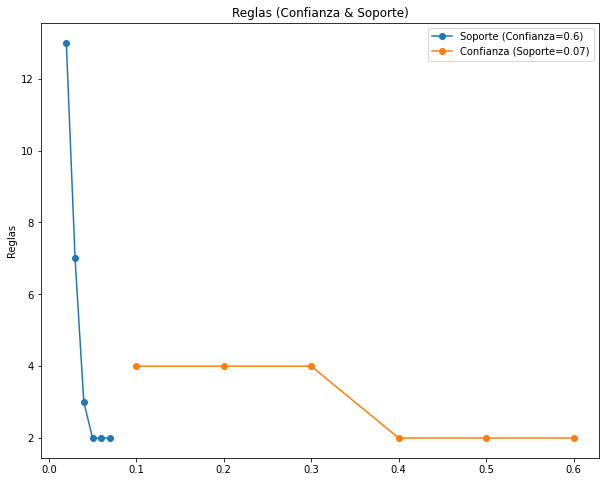

In [ ]:
confianza_minima=0.6 #@param {type:"slider", min:0, max:1, step:0.1}
soporte_minimo=0.07 #@param {type:"slider", min:0.01, max:0.1, step:0.01}

rules_generos_ = []
items_generos_ = {}
rules_generos = []
items_generos = {}

for n, j in zip(np.arange(0.02, 0.08, 0.01), np.arange(0.1, 0.7, 0.1)):
    n = n.round(3)
    itemset, rules = apriori(transacciones_generos, min_support = n, min_confidence =confianza_minima)
    rules_generos.append(len(rules))
    items_generos[n] = {}
    if len(itemset.keys()):
        for k in itemset.keys():
            items_generos[n][k] = len(list(itemset[k].values()))

    itemset_, rules_ = apriori(transacciones_generos, min_support = soporte_minimo, min_confidence = j)
    rules_generos_.append(len(rules_))
    items_generos_[j] = {}
    if len(itemset_.keys()):
        for k_ in itemset_.keys():
            items_generos_[j][k_] = len(list(itemset_[k_].values()))


figure(figsize=(10,8))
plt.plot(list(np.arange(0.02, 0.08, 0.01)), rules_generos, marker = 'o', label = f'Soporte (Confianza={confianza_minima})')
plt.plot(list(np.arange(0.1, 0.7, 0.1)), rules_generos_,  marker = 'o', label = f'Confianza (Soporte={soporte_minimo})')
plt.title('Reglas (Confianza & Soporte)')
plt.ylabel('Reglas')
plt.legend()
    

La siguiente gráfica busca corroborar el comportamiento de las reglas que se encuentran para diferentes valores de soporte, usando dos valores de confianza mínima diferentes.

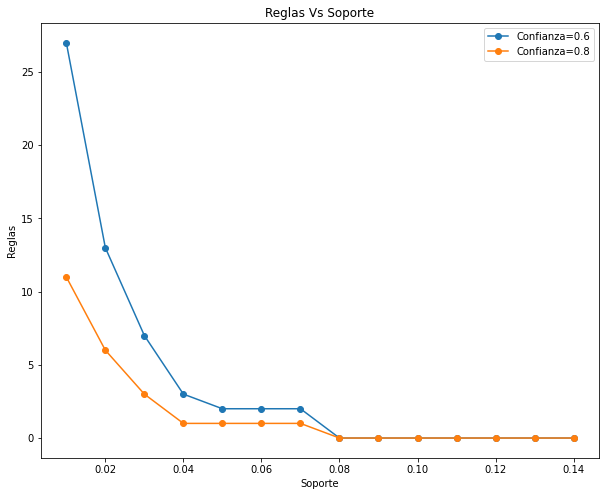

In [ ]:
minima_confianza_1 = 0.6 #@param {type:"slider", min:0, max:1, step:0.1}
minima_confianza_2 = 0.8 #@param {type:"slider", min:0, max:1, step:0.1}

rules_generos_1 = []
items_generos_1 = {}
for n in np.arange(0.01, 0.15, 0.01):
    n = n.round(3)
    itemset, rules = apriori(transacciones_generos, min_support = n, min_confidence = minima_confianza_1)
    rules_generos_1.append(len(rules))
    items_generos_1[n] = {}
    if len(itemset.keys()):
        for k in itemset.keys():
            items_generos_1[n][k] = len(list(itemset[k].values()))

rules_generos_2 = []
items_generos_2 = {}
for n in np.arange(0.01, 0.15, 0.01):
    n = n.round(3)
    itemset, rules = apriori(transacciones_generos, min_support = n, min_confidence = minima_confianza_2)
    rules_generos_2.append(len(rules))
    items_generos_2[n] = {}
    if len(itemset.keys()):
        for k in itemset.keys():
            items_generos_2[n][k] = len(list(itemset[k].values()))

figure(figsize=(10,8))
plt.plot(list(np.arange(0.01, 0.15, 0.01)), rules_generos_1, marker = 'o', label = f'Confianza={minima_confianza_1}')
plt.plot(list(np.arange(0.01, 0.15, 0.01)), rules_generos_2, marker = 'o', label = f'Confianza={minima_confianza_2}')
plt.title(f'Reglas Vs Soporte')
plt.ylabel('Reglas')
plt.xlabel('Soporte')
plt.legend()
    

Teniend ya una idea del soporte mínimo que debe usarse, se procede a buscar el mejor valor de confianza para obtener la mayor cantidad de reglas posibles.

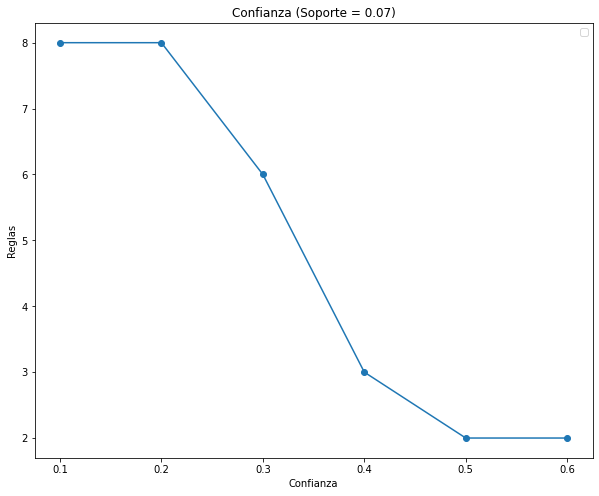

In [ ]:
soporte_minimo=0.07 #@param {type:"slider", min:0.01, max:0.1, step:0.01}
rules_generos = []
items_generos = {}
for n in np.arange(0.1, 0.7, 0.1):
    n = n.round(3)
    itemset, rules = apriori(transacciones_generos, min_support = 0.06, min_confidence = n)
    rules_generos.append(len(rules))
    items_generos[n] = {}
    if len(itemset.keys()):
        for k in itemset.keys():
            items_generos[n][k] = len(list(itemset[k].values()))
            
figure(figsize=(10,8))
plt.plot(list(np.arange(0.1, 0.7, 0.1)), rules_generos, marker = 'o')
plt.title(f'Confianza (Soporte = {soporte_minimo})')
plt.ylabel('Reglas')
plt.xlabel('Confianza')
plt.legend()

De acuerdo a lo motrado anteriormente, usando dos valores de confianza para los mismos valores de soporte, se procede a extraer las reglas usando el algoritmo apriori para un valor de soporte mínimo y confianza mínima de 0.07 y 0.6 respectivamente. Para cada regla se deduce los valores de lift y conviction.

In [ ]:
itemset, rules = apriori(transacciones_generos, min_support = 0.07, min_confidence = 0.6)

for r in rules:
  print(r, r.confidence)

{ Adventure} -> {Action} (conf: 0.850, supp: 0.072, lift: 3.827, conv: 5.198) 0.8503723764387271
{ Sci-Fi} -> {Action} (conf: 0.636, supp: 0.074, lift: 2.864, conv: 2.138) 0.63623046875


### Implementación del algoritmo FP-Growth

Usando el algoritmo FP-Growth es posible en primera instancia graficar el número de itemsets frecuentes que se pueden obtener fijando un valor mínimo de soporte. De este modo se escoge el valor de soporte más alto que luegopueda servir como base para deducir de los diferentes itemsets frecuentes las reglas posibles que cumplan con el valor mínimo de confianza. 

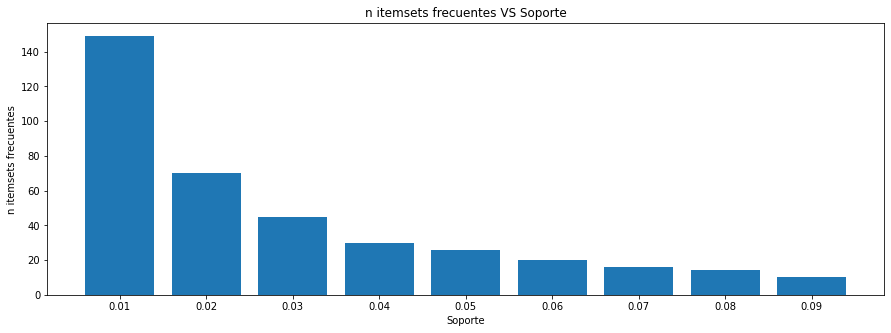

In [ ]:
def frecuencias(soportes):
  frecuencias = list(np.array(soportes)*17499)
  return frecuencias

soportes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
confianza = 0.6
frecuencias_ = frecuencias(soportes)
frecuent_patterns = {}
rules_ = {}
for n in frecuencias_:
  patterns = pyfpgrowth.find_frequent_patterns(transacciones_generos, n)
  frecuent_patterns[str(round(n/17499, 3))] = len(list(patterns.keys()))
  rules_[str(round(n/17499, 3))] = len(list(pyfpgrowth.generate_association_rules(patterns, confianza).keys()))

figure(figsize = (15,5))
plt.bar(list(frecuent_patterns.keys()),list(frecuent_patterns.values()))
plt.title('n itemsets frecuentes VS Soporte')
plt.ylabel('n itemsets frecuentes')
plt.xlabel('Soporte')
plt.show()



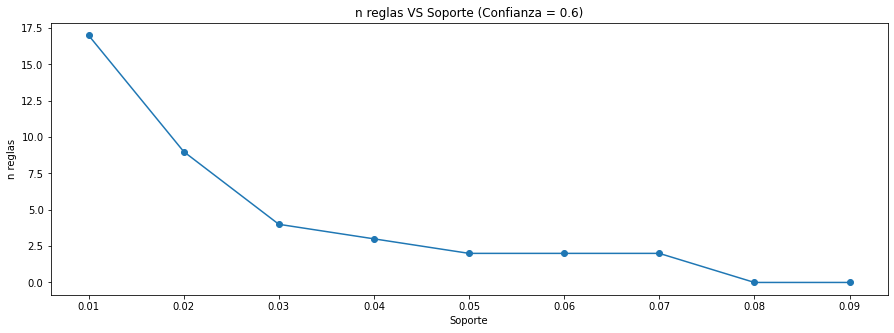

In [ ]:
confianza_minima=0.6 #@param {type:"slider", min:0, max:1, step:0.1}

soportes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
frecuencias_ = frecuencias(soportes)
frecuent_patterns = {}
rules_ = {}
for n in frecuencias_:
  patterns = pyfpgrowth.find_frequent_patterns(transacciones_generos, n)
  frecuent_patterns[str(round(n/17499, 3))] = len(list(patterns.keys()))
  rules_[str(round(n/17499, 3))] = len(list(pyfpgrowth.generate_association_rules(patterns, confianza_minima).keys()))

figure(figsize = (15,5))
plt.plot(list(rules_.keys()), list(rules_.values()), marker = 'o')
plt.title(f'n reglas VS Soporte (Confianza = {confianza_minima})')
plt.ylabel('n reglas')
plt.xlabel('Soporte')
plt.show()

In [ ]:
#patterns = pyfpgrowth.find_frequent_patterns(transacciones_generos, 0.07)
rules = pyfpgrowth.generate_association_rules(patterns,confianza_minima)
print(f'Reglas que se deducen con soporte mínimo = {soportes[-1]} y  confianza mínima = {confianza_minima}')
print(rules)

Reglas que se deducen con soporte mínimo = 0.07 y  confianza mínima = 0.6
{(' Adventure',): (('Action',), 0.8503723764387271), (' Sci-Fi',): (('Action',), 0.63623046875)}


# Asociación PRODUCERS

### Implementación del algoritmo Apriori

In [ ]:
# Número total de reglas que pueden extraerse del itemset Producers
n_total_items = 1306
print(f"En total se pueden obtener {2**n_total_items} itemsets para la variable Genre" )
print(f"Y {3**n_total_items - 2**(n_total_items+1) + 1} reglas de asociación")

En total se pueden obtener 1396929012345909367261291622592783789790596764952311329016613574647912156771846841324605694061300936249001867043036692739309800238387459269058266970746201893926903299127975822501051072519007313026653938862107442109582452378709477603379721197016157852628933051489796579449023834760011283061566895273581065416395700245104675196939691352452307225355370376804414965197291389925332096749218838872064 itemsets para la variable Genre
Y 1319345875963182312590763991838263669681859166029935827614049667983956820723859666501312773355702479637811018813385209625754177003705852402553039299912106690858688491008072855344080297507056670920673126905086122086011098846320843414601274053419860249089424395953823968225288527863446733047339494044052760642058848950500749958471678843779026784423585008332560052741619688620708314078452953338648215520719815332813661871124802219148869504705607914573364414836936885544885817431201666878566549408211313652050565385650527326517073417978306119987047

Para la variable producers se procede de la misma manera que con la variable Genres, encontrando aún menos reglas de asociación. Esto puede deberse al alto número de productores (un total de 1306) y al alto número de posibles combinaciones que pueden darse entre estos, que sin duda alguna es muy superior al número total de registros. 

In [ ]:
producers_transacciones = []
for registro in data['Producers']:
    if type(registro) is float:
        continue
    transaccion = registro.split(',')
    producers_transacciones.append(set(transaccion))

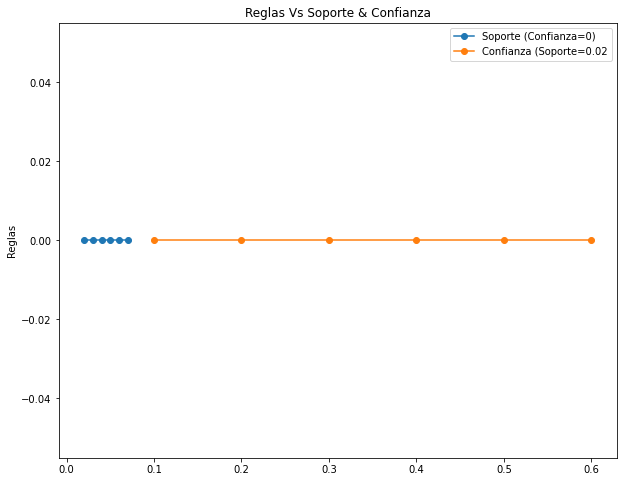

In [ ]:
confianza_minima=0 #@param {type:"slider", min:0, max:1, step:0.1}
soporte_minimo=0.02 #@param {type:"slider", min:0.01, max:0.1, step:0.01}

rules_producers_ = []
items_producers_ = {}
rules_producers = []
items_producers = {}

for n, j in zip(np.arange(0.02, 0.08, 0.01), np.arange(0.1, 0.7, 0.1)):
    n = n.round(3)
    itemset, rules = apriori(producers_transacciones, min_support = n, min_confidence =confianza_minima)
    rules_producers.append(len(rules))
    items_producers[n] = {}
    if len(itemset.keys()):
        for k in itemset.keys():
            items_producers[n][k] = len(list(itemset[k].values()))

    j = j.round(3)
    itemset_, rules_ = apriori(producers_transacciones, min_support = soporte_minimo, min_confidence = j)
    rules_producers_.append(len(rules_))
    items_producers_[j] = {}
    if len(itemset_.keys()):
        for k_ in itemset_.keys():
            items_producers_[j][k_] = len(list(itemset_[k_].values()))



figure(figsize=(10,8))
plt.title(f'Reglas Vs Soporte & Confianza')
plt.plot(list(np.arange(0.02, 0.08, 0.01)), rules_producers, marker = 'o', label = f'Soporte (Confianza={confianza_minima})')
plt.plot(list(np.arange(0.1, 0.7, 0.1)), rules_producers_, marker = 'o', label = f'Confianza (Soporte={soporte_minimo}')
plt.ylabel('Reglas')
plt.legend()
    

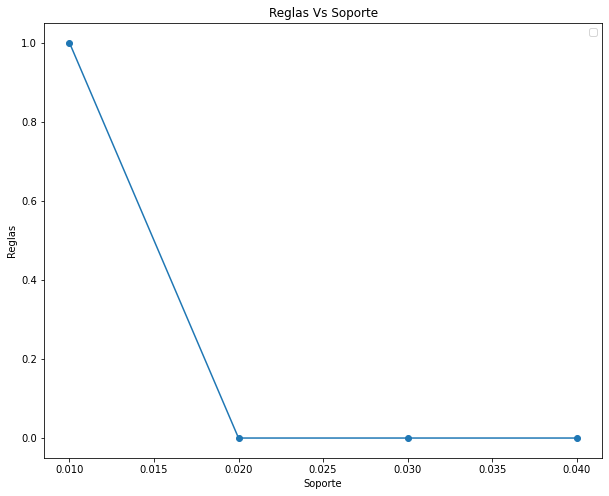

In [ ]:
rules_producers = []
items_producers = {}
for n in np.arange(0.01, 0.05, 0.01):
    n = n.round(3)
    itemset, rules = apriori(producers_transacciones, min_support = n, min_confidence = 0.3)
    rules_producers.append(len(rules))
    items_producers[n] = {}
    if len(itemset.keys()):
        for k in itemset.keys():
            items_producers[n][k] = len(list(itemset[k].values()))
            
figure(figsize=(10,8))
plt.plot(list(np.arange(0.01, 0.05, 0.01)), rules_producers, marker = 'o')
plt.title(f'Reglas Vs Soporte')
plt.ylabel('Reglas')
plt.xlabel('Soporte')
plt.legend()

### Implementación del algoritmo FP-Growth

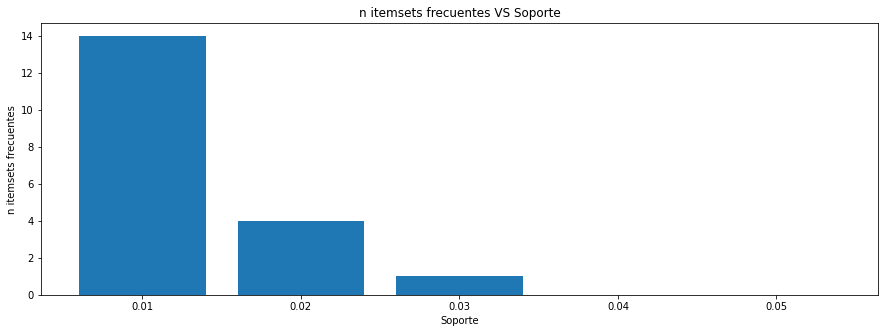

In [ ]:
soportes = [0.01, 0.02, 0.03, 0.04, 0.05]
confianza = 0.6
frecuencias_ = frecuencias(soportes)
frecuent_patterns = {}
rules_ = {}
for n in frecuencias_:
  patterns = pyfpgrowth.find_frequent_patterns(producers_transacciones, n)
  frecuent_patterns[str(round(n/17499, 3))] = len(list(patterns.keys()))
  rules_[str(round(n/17499, 3))] = len(list(pyfpgrowth.generate_association_rules(patterns, confianza).keys()))

figure(figsize = (15,5))
plt.bar(list(frecuent_patterns.keys()),list(frecuent_patterns.values()))
plt.title('n itemsets frecuentes VS Soporte')
plt.ylabel('n itemsets frecuentes')
plt.xlabel('Soporte')
plt.show()

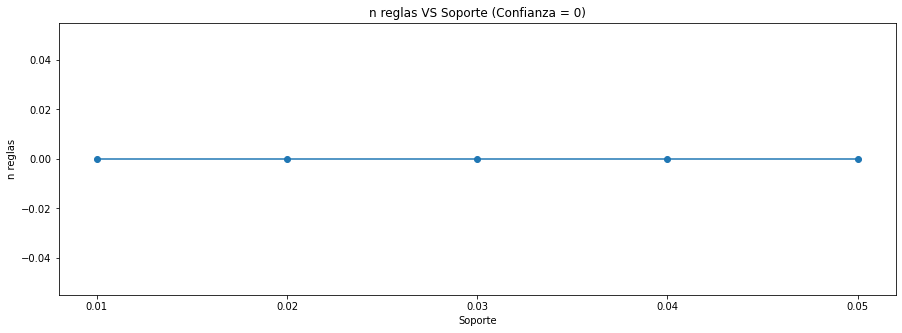

In [ ]:
confianza_minima=0.2 #@param {type:"slider", min:0, max:1, step:0.1}

soportes = [0.01, 0.02, 0.03, 0.04, 0.05]
confianza = 0.6
frecuencias_ = frecuencias(soportes)
frecuent_patterns = {}
rules_ = {}
for n in frecuencias_:
  patterns = pyfpgrowth.find_frequent_patterns(producers_transacciones, n)
  frecuent_patterns[str(round(n/17499, 3))] = len(list(patterns.keys()))
  rules_[str(round(n/17499, 3))] = len(list(pyfpgrowth.generate_association_rules(patterns, confianza_minima).keys()))

figure(figsize = (15,5))
plt.plot(list(rules_.keys()), list(rules_.values()), marker = 'o')
plt.title(f'n reglas VS Soporte (Confianza = {confianza_minima})')
plt.ylabel('n reglas')
plt.xlabel('Soporte')
plt.show()

Para la variable Producers NO es posible encontrar reglas con el soporte adecuado.

#Score & Genres

Sin embargo, se observa una mejoría en la formulación de reglas de asociación si se incoprpora a las transacciones del género (Genre) información sobre la calificación (Score). Para eso es necesario primero realizar una discretización de la variable Score en cinco bins de igual amplitud, resultando en una escala ordinal de 0 a 4 donde cada valor representa, en orden, la calificación Muy Malo, Malo, Regular, Bueno y Muy Bueno. Son estas últimas categorías con las que se discretiza la variable para luego complementar las transacciones del género.

In [ ]:
data_2= pd.read_csv('imputed_data.csv')
# Imputed_data.csv corresponde al dataset Row_data.csv proveniente del análisis exploratorio
# con los valores de Score imputados

discretizer = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy = 'uniform')
discretized_score = discretizer.fit_transform(data_2['Score'].values.reshape(-1,1)).astype(int)
data_2['Score'] = discretized_score

score_categories = {0:'Muy Malo', 1:'Malo', 2:'Regular', 3:'Bueno', 4:'Muy Bueno'}
score_series = data_2['Score']
for n in score_categories.keys():
    score_series = score_series.replace(n, score_categories[n])
data_2['Score'] = score_series
data_2.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (70,71) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,MAL_ID,Score,Type,Episodes,Source,Duration,Rating,Ranked,Popularity,...,Studios foodunited.,Studios helo.inc,Studios iDRAGONS Creative Studio,Studios ixtl,Studios l-a-unch・BOX,Studios monofilmo,Studios pH Studio,Studios production doA,Studios teamKG,Studios ufotable
0,0,1.0,Muy Bueno,TV,26.0,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39.0,...,0,0,0,0,0,0,0,0,0,0
1,1,5.0,Muy Bueno,Movie,1.0,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518.0,...,0,0,0,0,0,0,0,0,0,0
2,2,6.0,Muy Bueno,TV,26.0,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201.0,...,0,0,0,0,0,0,0,0,0,0
3,3,7.0,Bueno,TV,26.0,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467.0,...,0,0,0,0,0,0,0,0,0,0
4,4,8.0,Bueno,TV,52.0,Manga,23 min. per ep.,PG - Children,3710.0,4369.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
score_genre_transacciones = []
for i in np.arange(data_2.shape[0]):
    id_ = data_2['MAL_ID'][i]
    score =  data_2['Score'][i]
    transaccion = data['Genres'][i]
    if type(transaccion) is float:
        continue
    transaccion = data['Genres'][i].split(',') + [score]
    score_genre_transacciones.append(set(transaccion))

print(f'hay un total de {len(score_genre_transacciones)} transacciones de Score & Genre')

hay un total de 17499 transacciones de Score & Genre


### Implementación del algoritmo Apriori

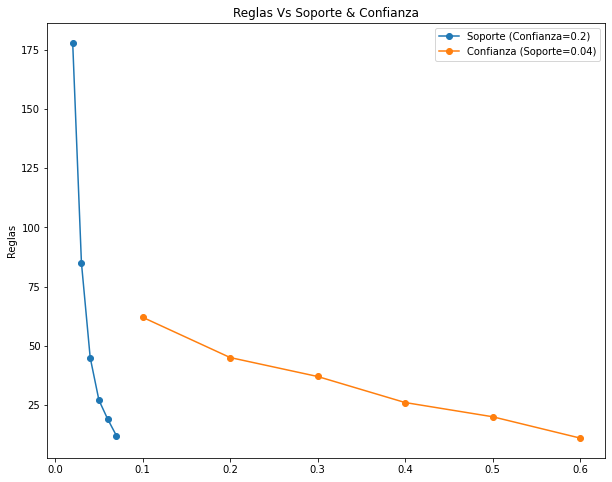

In [ ]:
confianza_minima=0.2 #@param {type:"slider", min:0, max:1, step:0.1}
soporte_minimo=0.04 #@param {type:"slider", min:0.01, max:0.1, step:0.01}

rules_generos_ = []
items_generos_ = {}
rules_generos = []
items_generos = {}

for n, j in zip(np.arange(0.02, 0.08, 0.01), np.arange(0.1, 0.7, 0.1)):
    n = n.round(3)
    itemset, rules = apriori(score_genre_transacciones, min_support = n, min_confidence =confianza_minima)
    rules_generos.append(len(rules))
    items_generos[n] = {}
    if len(itemset.keys()):
        for k in itemset.keys():
            items_generos[n][k] = len(list(itemset[k].values()))

    itemset_, rules_ = apriori(score_genre_transacciones, min_support = soporte_minimo, min_confidence = j)
    rules_generos_.append(len(rules_))
    items_generos_[j] = {}
    if len(itemset_.keys()):
        for k_ in itemset_.keys():
            items_generos_[j][k_] = len(list(itemset_[k_].values()))


figure(figsize=(10,8))
plt.plot(list(np.arange(0.02, 0.08, 0.01)), rules_generos, marker = 'o', label = f'Soporte (Confianza={confianza_minima})')
plt.title(f'Reglas Vs Soporte & Confianza')
plt.plot(list(np.arange(0.1, 0.7, 0.1)), rules_generos_, marker = 'o', label = f'Confianza (Soporte={soporte_minimo})')
plt.ylabel('Reglas')
plt.legend()
    

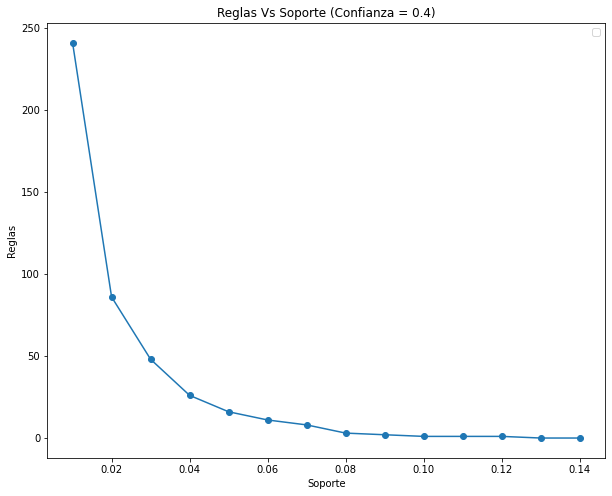

In [ ]:
minima_confianza = 0.4 #@param {type:"slider", min:0, max:1, step:0.1}
rules_score_genre = []
items_score_genre = {}
for n in np.arange(0.01, 0.15, 0.01):
    n = n.round(3)
    itemset, rules = apriori(score_genre_transacciones, min_support = n, min_confidence = minima_confianza)
    rules_score_genre.append(len(rules))
    items_score_genre[n] = {}
    if len(itemset.keys()):
        for k in itemset.keys():
            items_score_genre[n][k] = len(list(itemset[k].values()))
            
figure(figsize=(10,8))
plt.plot(list(np.arange(0.01, 0.15, 0.01)), rules_score_genre, marker = 'o')
plt.title(f'Reglas Vs Soporte (Confianza = {minima_confianza})')
plt.ylabel('Reglas')
plt.xlabel('Soporte')
plt.legend()

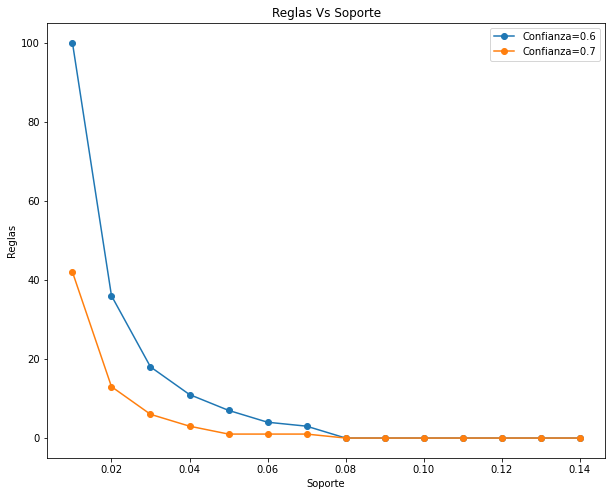

In [ ]:
minima_confianza_1 = 0.6 #@param {type:"slider", min:0, max:1, step:0.1}
minima_confianza_2 = 0.7 #@param {type:"slider", min:0, max:1, step:0.1}

rules_generos_1 = []
items_generos_1 = {}
for n in np.arange(0.01, 0.15, 0.01):
    n = n.round(3)
    itemset, rules = apriori(score_genre_transacciones, min_support = n, min_confidence = minima_confianza_1)
    rules_generos_1.append(len(rules))
    items_generos_1[n] = {}
    if len(itemset.keys()):
        for k in itemset.keys():
            items_generos_1[n][k] = len(list(itemset[k].values()))

rules_generos_2 = []
items_generos_2 = {}
for n in np.arange(0.01, 0.15, 0.01):
    n = n.round(3)
    itemset, rules = apriori(score_genre_transacciones, min_support = n, min_confidence = minima_confianza_2)
    rules_generos_2.append(len(rules))
    items_generos_2[n] = {}
    if len(itemset.keys()):
        for k in itemset.keys():
            items_generos_2[n][k] = len(list(itemset[k].values()))

figure(figsize=(10,8))
plt.plot(list(np.arange(0.01, 0.15, 0.01)), rules_generos_1, marker = 'o', label = f'Confianza={minima_confianza_1}')
plt.plot(list(np.arange(0.01, 0.15, 0.01)), rules_generos_2, marker = 'o', label = f'Confianza={minima_confianza_2}')
plt.title(f'Reglas Vs Soporte')
plt.ylabel('Reglas')
plt.xlabel('Soporte')
plt.legend()

De acuerdo a la anterior gráfica el mejor valor de soporte mínimo usar para obtener reglas es 0.07, usando una confianza de 0.6. Las reglas se muestran a continuación.

In [ ]:
itemset, rules = apriori(score_genre_transacciones, min_support = 0.07, min_confidence = 0.6)
for r in rules:
  print(r, r.confidence)

{ Adventure} -> {Action} (conf: 0.850, supp: 0.072, lift: 3.827, conv: 5.198) 0.8503723764387271
{ Sci-Fi} -> {Action} (conf: 0.636, supp: 0.074, lift: 2.864, conv: 2.138) 0.63623046875
{ Shounen} -> {Bueno} (conf: 0.628, supp: 0.071, lift: 1.453, conv: 1.527) 0.6284704694598687


### Implementación del algoritmo FP-Growth

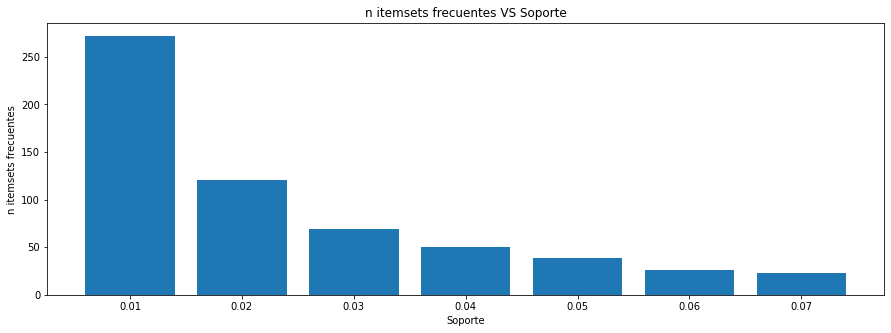

In [ ]:
soportes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
frecuencias_ = frecuencias(soportes)
frecuent_patterns = {}
rules_ = {}
for n in frecuencias_:
  patterns = pyfpgrowth.find_frequent_patterns(score_genre_transacciones, n)
  frecuent_patterns[str(round(n/17499, 3))] = len(list(patterns.keys()))

figure(figsize = (15,5))
plt.bar(list(frecuent_patterns.keys()),list(frecuent_patterns.values()))
plt.title('n itemsets frecuentes VS Soporte')
plt.ylabel('n itemsets frecuentes')
plt.xlabel('Soporte')
plt.show()

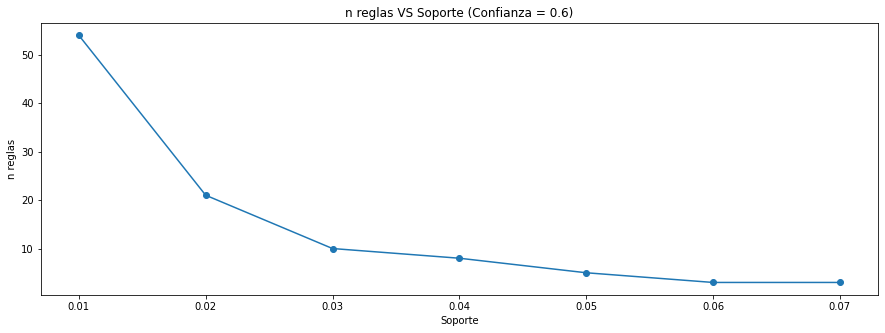

In [ ]:
confianza_minima=0.6 #@param {type:"slider", min:0, max:1, step:0.1}

soportes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
confianza = 0.6
frecuencias_ = frecuencias(soportes)
frecuent_patterns = {}
rules_ = {}
for n in frecuencias_:
  patterns = pyfpgrowth.find_frequent_patterns(score_genre_transacciones, n)
  frecuent_patterns[str(round(n/17499, 3))] = len(list(patterns.keys()))
  rules_[str(round(n/17499, 3))] = len(list(pyfpgrowth.generate_association_rules(patterns, confianza_minima).keys()))

figure(figsize = (15,5))
plt.plot(list(rules_.keys()), list(rules_.values()), marker = 'o')
plt.title(f'n reglas VS Soporte (Confianza = {confianza_minima})')
plt.ylabel('n reglas')
plt.xlabel('Soporte')
plt.show()

El algoritmo Fp_growth indica una combinación de soporte mínimo y confianza mínima similares a las que expone el algoritmoapriori, por lo que se usan para deducir las reglas y comparar.

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(score_genre_transacciones, n)
rules = pyfpgrowth.generate_association_rules(patterns, confianza_minima)

print(f'Usando un soporte mínimo de {n/17499} y una confianza mínima de {confianza_minima}, las reglas encontradas son: \n')
rules

Usando un soporte mínimo de 0.07 y una confianza mínima de 0.6, las reglas encontradas son: 



{(' Adventure',): (('Action',), 0.8503723764387271),
 (' Shounen',): (('Bueno',), 0.6284704694598687),
 (' Sci-Fi',): (('Action',), 0.63623046875)}

# Conclusiones:


1.   Usando los parámetros óptimos, los algoritmos Apriori y Fp-Growth deducen las siguientes reglas para la variables Genres: 
Aventura --> Acción, Sci-fi --> Acción.

2.   No es posible deducir reglas para la variable Producers.

3. Usando los parámetros óptimos para el itemset deducido de la combinación de Genres y Score (discretizado), los algoritmos Apriori y Fp-Growth deducen una regla adicional a las obtenidas solo con la variable Genres: Shounen --> Bueno.

